# 1. Analytics Water Consumer Data

## 1.0. Initialization

In [1]:
from IPython.display import display
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

df_dado = pd.read_csv('src/competition.csv')
df_dado.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [2]:
df_train = pd.read_csv('src/train.csv')
df_train

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,Installation_zone 2
329971,2020,12,rural domestic,0,RVZG94535208799772,Installation_zone 47
329972,2020,12,rural domestic,0,DWGA69725679861554,Installation_zone 7
329973,2020,12,rural domestic,0,VJDC45865594518045,Installation_zone 32


In [3]:
df_competition = pd.read_csv('src/competition.csv')

df_competition

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3
...,...,...,...,...,...
18274,2020,12,0,AEQZ48426066915128,Installation_zone 26
18275,2020,12,0,BMPP69449933761787,Installation_zone 17
18276,2020,12,0,XFJB02101108755437,Installation_zone 44
18277,2020,12,0,YRTP25456715504279,Installation_zone 2


## 1.1. Analytics

### 1.1.0 Preparing

In [4]:
df_analytics = df_train.copy()
map_names = {
    'Year': 'year',
    'Month': 'month',
    'Consumer_type': 'consumer_type',
    'Consumption': 'consumption',
    'Consumer_number': 'consumer_number',
    'Installation_zone': 'installation_zone',
}
df_analytics = df_analytics.rename(columns=map_names)

df_analytics.installation_zone = df_analytics.installation_zone.str.replace('Installation_zone ', '').astype(int)

df_analytics

,year,month,consumer_type,consumption,consumer_number,installation_zone
0,2013,1,domestic,0,MOGV36480546611521,1
1,2013,1,industrial,5,BECS02817768252637,2
2,2013,1,domestic,6,VRFW65577141436242,2
3,2013,1,domestic,1,QLLI18662653137621,2
4,2013,1,domestic,13,HYUO61823402850645,2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,2
329971,2020,12,rural domestic,0,RVZG94535208799772,47
329972,2020,12,rural domestic,0,DWGA69725679861554,7
329973,2020,12,rural domestic,0,VJDC45865594518045,32


### 1.1.1. Consumer Type

consumer_type
domestic               236167
rural domestic          63086
industrial              21057
rural commercial         5541
construction             2235
low income families       999
rural expansion           890
Name: count, dtype: int64


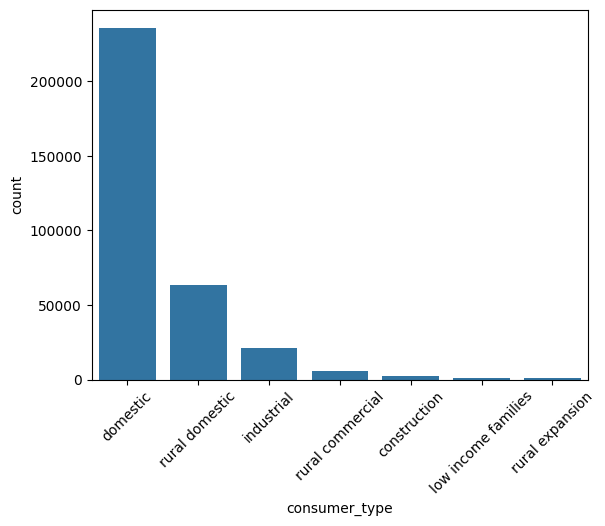

In [5]:
# graph with consumer type
import seaborn as sns

print(df_analytics.consumer_type.value_counts())
ax = sns.countplot(x='consumer_type', data=df_analytics, order=df_analytics.consumer_type.value_counts().index)
ax.tick_params(axis='x', rotation=45)

Consumer_type,construction,domestic,industrial,low income families,rural commercial,rural domestic,rural expansion
Installation_zone,,,,,,,
Installation_zone 1,230,73358,3511,322,51,0,0
Installation_zone 10,19,0,0,2,0,4157,59
Installation_zone 11,13,0,0,0,0,990,13
Installation_zone 12,11,0,10,0,0,1326,13
Installation_zone 13,9,0,0,0,0,1688,0
Installation_zone 14,6,0,0,0,0,1080,56
Installation_zone 15,0,0,0,0,0,225,0
Installation_zone 16,6,0,41,0,8,2774,0
Installation_zone 17,0,0,0,0,0,1895,51


<Axes: xlabel='installation_zone'>

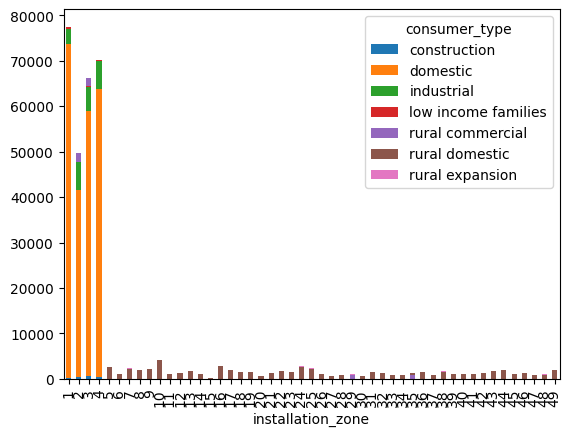

In [6]:
# Consumer Type amount by the Installation Zone

display(pd.crosstab(df_train.Installation_zone, df_train.Consumer_type))
df_analytics.groupby(['installation_zone', 'consumer_type']).size().unstack().plot(kind='bar', stacked=True)

In [7]:
# Consumption mean by Consumer Type
df_train.groupby(df_train.Consumer_type).Consumption.mean()

Consumer_type
construction            7.730201
domestic                6.810613
industrial             11.294819
low income families     9.031031
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: Consumption, dtype: float64

consumer_type
industrial             11.294819
low income families     9.031031
construction            7.730201
domestic                6.810613
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: consumption, dtype: float64

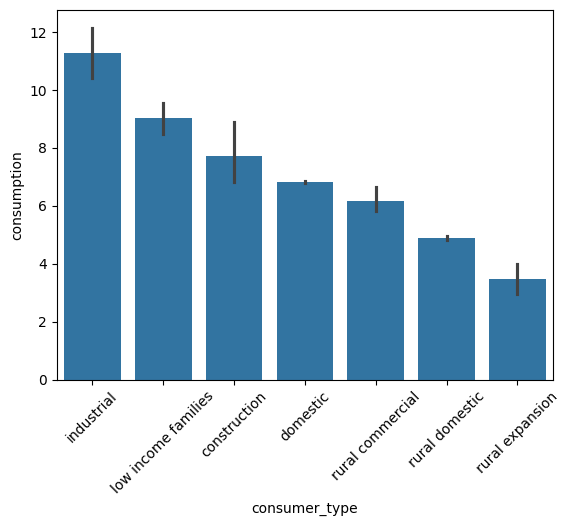

In [8]:
# Consumption mean by Consumer Type GRAPH

display(df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False))

ax = sns.barplot(x='consumer_type', y='consumption', data=df_analytics, order=df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False).index)
ax.tick_params(axis='x', rotation=45)

consumer_type
industrial             11.294819
low income families     9.031031
construction            7.730201
domestic                6.810613
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: consumption, dtype: float64

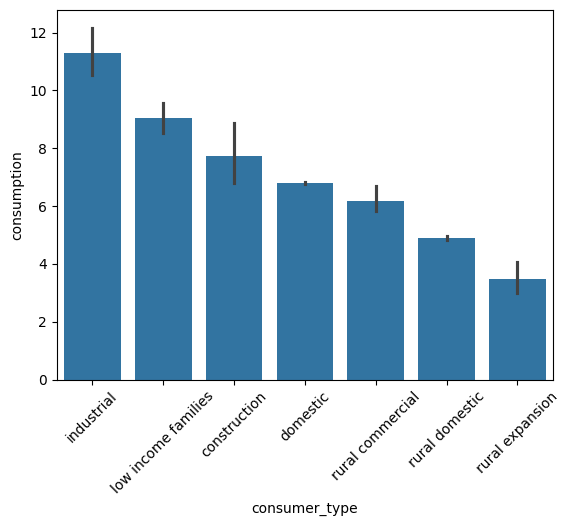

In [9]:
# Consumption mean by Consumer Type GRAPH

display(df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False))

ax = sns.barplot(x='consumer_type', y='consumption', data=df_analytics, order=df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False).index)
ax.tick_params(axis='x', rotation=45)

<Axes: >

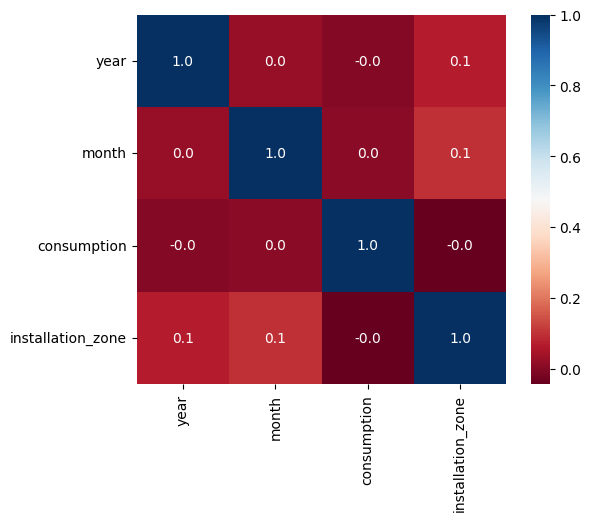

In [10]:
# Correlation Matrix
import seaborn as sns

corr = df_analytics.drop(columns=['consumer_type', 'consumer_number']).corr()
sns.heatmap(corr, cmap='RdBu', fmt='.1f', square=True, linecolor='white', annot=True)

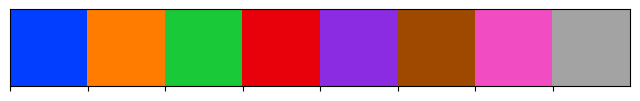

In [11]:
import seaborn as sns

colors = sns.color_palette('bright', 8)
sns.set_palette(colors)
sns.palplot(colors)

### 1.2. TSNE Visualization

<Axes: title={'center': 'TSNE Visualization'}>

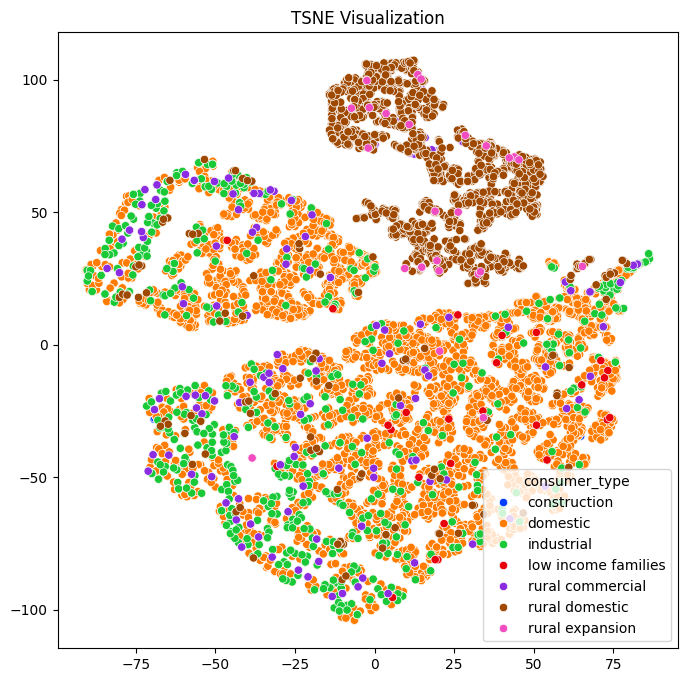

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

df_visualization_tsne = df_analytics.sample(10000).sort_values(by='consumer_type')
consumer_type_tsne = df_visualization_tsne.consumer_type
df_visualization_tsne = df_visualization_tsne.drop(columns=['consumer_type', 'consumer_number'])

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_visualization_tsne)

plt.figure(figsize=(8, 8))
plt.title('TSNE Visualization')
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=consumer_type_tsne)


### 1.3. PCA Visualization

<Axes: title={'center': 'PCA Visualization'}>

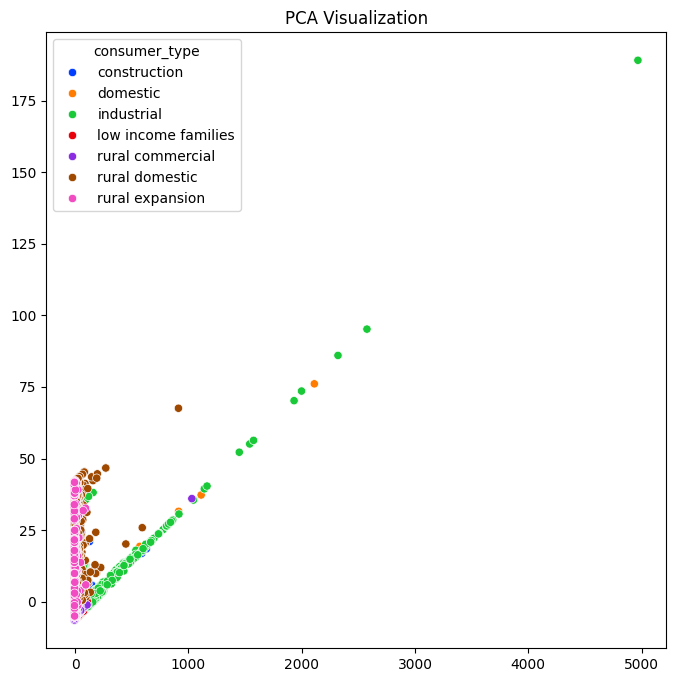

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_visualization_pca = df_analytics.sort_values(by='consumer_type')
consumer_type_pca = df_visualization_pca.consumer_type
df_visualization_pca = df_visualization_pca.drop(columns=['consumer_type', 'consumer_number'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_visualization_pca)

plt.figure(figsize=(8, 8))
plt.title('PCA Visualization')
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=consumer_type_pca)
